In [ ]:
for year in years:
    data = requests.get(standings_url)
    soup = BeautifulSoup(data.text)
    standings_table = soup.select('table.stats_table')[0]

    links = [l.get("href") for l in standings_table.find_all('a')]
    links = [l for l in links if '/squads/' in l]
    team_urls = [f"https://fbref.com{l}" for l in links]
    
    previous_season = soup.select("a.prev")[0].get("href")
    standings_url = f"https://fbref.com{previous_season}"
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
        data = requests.get(team_url)
        matches = pd.read_html(data.text, match="Scores & Fixtures")[0] # df
        soup = BeautifulSoup(data.text)
        links = [l.get("href") for l in soup.find_all('a')]
        links = [l for l in links if l and 'all_comps/shooting/' in l]
        data = requests.get(f"https://fbref.com{links[0]}")
        shooting = pd.read_html(data.text, match="Shooting")[0]
        shooting.columns = shooting.columns.droplevel()
        try:
            # team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
            team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on=["Date", "Opponent"], how='inner')
        except ValueError:
            continue
        team_data = team_data[team_data["Comp"] == "Premier League"]
        
        team_data["Season"] = f"{year-1}-{year}"
        team_data["Team"] = team_name
        team_data["url"] = f"https://fbref.com{links[0]}"
        all_matches.append(team_data)
        time.sleep(2)

# Matplotlib 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Styles

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')

## Basic plot

### plot()

- default

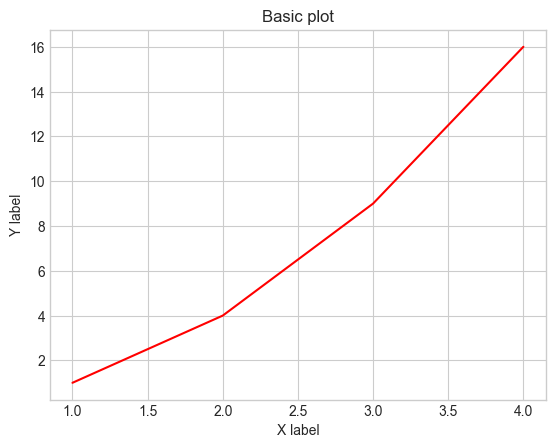

In [10]:
plt.plot([1,2,3,4],[1,4,9,16], color='red')
plt.title("Basic plot")
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()

- without line

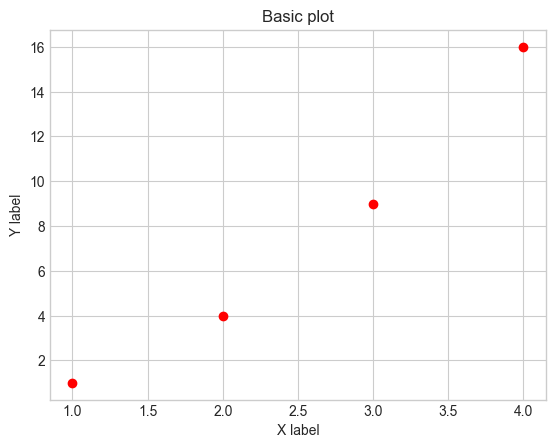

In [13]:
plt.plot([1,2,3,4],[1,4,9,16], 'o', color='red')
plt.title("Basic plot")
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()

- multiple lines

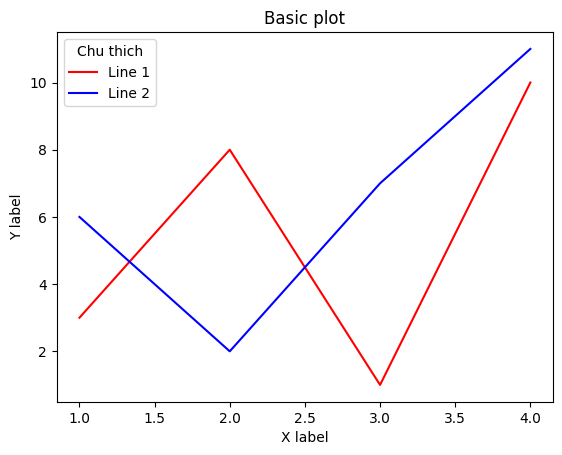

In [9]:
plt.plot([1,2,3,4],[3, 8, 1, 10], color='red', label='Line 1')
plt.plot([1,2,3,4],[6, 2, 7, 11], color='blue', label='Line 2')
plt.title("Basic plot")
plt.xlabel('X label')
plt.ylabel('Y label')
plt.legend(title='Chu thich')
plt.show()

## Scatter

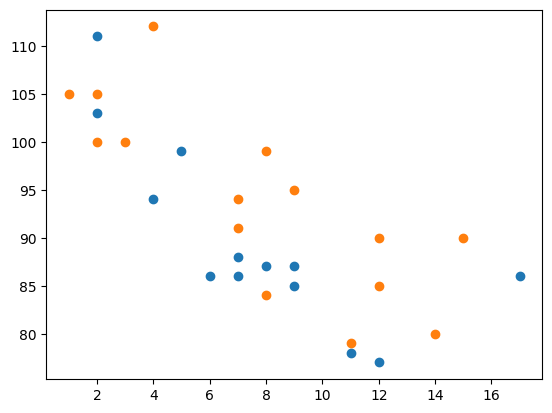

In [11]:
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y)
x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y)
plt.show()

## Bars

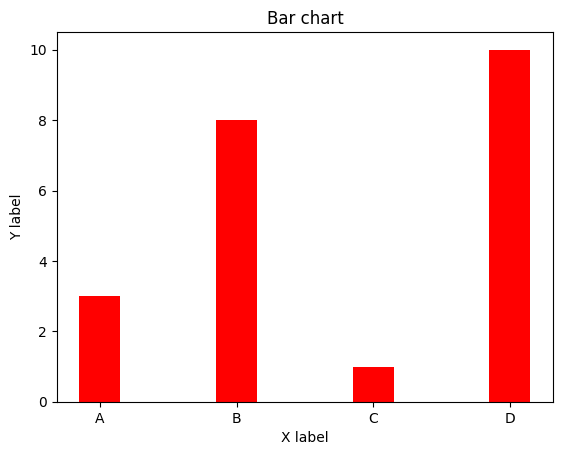

In [16]:
x = np.array(["A", "B", "C", "D"])
y = np.array([3, 8, 1, 10])

plt.title("Bar chart")
plt.xlabel('X label')
plt.ylabel('Y label')
plt.bar(x,y, color = "red", width = 0.3)
plt.show()

## Histogram
A histogram is a graph showing frequency distributions.



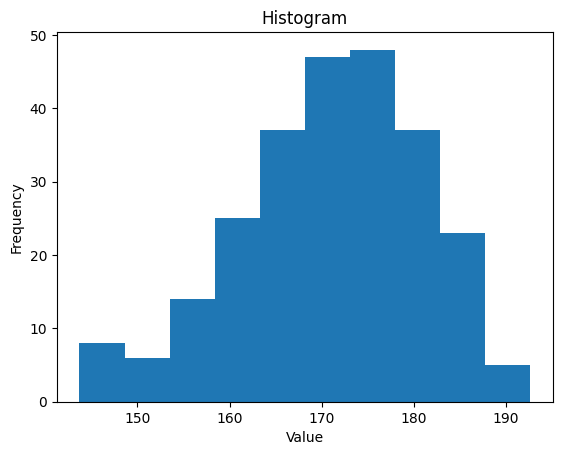

In [18]:
x = np.random.normal(170, 10, 250)

plt.title("Histogram")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.hist(x)
plt.show() 

## Pie chart

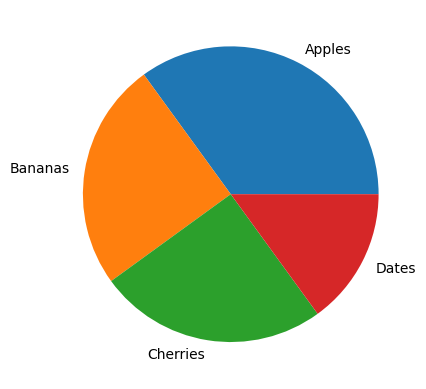

In [23]:
y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]

plt.pie(y, labels = mylabels)
plt.show() 

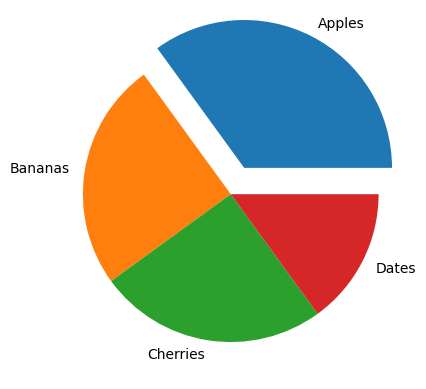

In [21]:
y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
myexplode = [0.2, 0, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Pyplot API vs Object-Oriented API
* Pyplot API -> Easy
* OO API -> Advanced

### Pyplot API

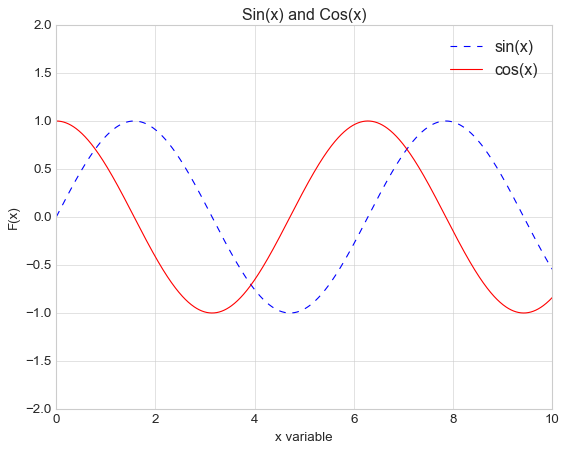

In [40]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), color='blue', linestyle='dashed', label='sin(x)')
plt.plot(x, np.cos(x), color='red', linestyle='solid', label='cos(x)')
plt.title('Sin(x) and Cos(x)')
plt.xlabel('x variable')
plt.ylabel('F(x)')

plt.xlim([0, 10])
plt.ylim([-2, 2])

# plt.axis([xmin, xmax, ymin, ymax])

plt.legend() # to show labels

### Object-Oriented API